# Project Summary



- In recent years the style and nature of the Press Releases has changed. Sharing news is clearly impacting on how people find news today. In this analysis, I address the problem of predicting online news popularity based on the number of shares of articles. I needed to find a model to explain why some news stories have more share than others and identify a group of variables to predict popularity.

- Initially, I formulated the prediction task as a regression linear where the target is measured at the continuous level. However, the target showed a high variance and for this reason I transformed the target value into a binary set I approached the regression model as a classification problem. Finally, since important features are related to the content, I am going to explore the words in an article as additional features.I used Natural Language Processing techniques to extract features from the Body and Title of texts, and then applied machine learning algorithms such as Naive Bayes and Random Forest.

- For this project, I used the Data Set from Mashable UK, an online digital media website online founded in 2005. The dataset contains information on 39,664 news stories and has 61 attributes. Given the large number of variables, I applied PCA to identify patterns and reduce the dimensions of the dataset with minimal loss of information.



# Aim

- The goal is to increases the popularity of individual news stories.


# DataSet 

### a) Data source: UCI ML Repository
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

- Number of Attributes 61
- Number of Records 39644

### b) Web Scraping: Importing a dataset from the web and saving as a local PostgreSQL 

### c) Importing a dataset from the URL of the article 

### Main libraries involved in this Notebook



    Pandas for data manipulation
    Matplotlib and seaborn for data visualization
    Numpy for multidimensional array computing
    sklearn for machine learning and predictive modeling
    matplotlib for plots

*Word Processing and NLPA:*


    import requests
    from bs4 import BeautifulSoup
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from nltk.corpus import stopwords
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    from wordcloud import WordCloud
    
*Principal Components:*

     
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

*Clustering:*

   
    from sklearn.cluster import KMeans, AgglomerativeClustering
    from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, 
    completeness_score,
    v_measure_score




# 1. DATA MINING

<a id='intro'></a>
# Step 1 Exploratory data analysis
> Mainly, I did the following:

1. Data extraction: I loaded the data set and had a first look at it
2. Cleanning: outliers and I renamed columns

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas_profiling
##from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

#import string
#import time

In [3]:
df = pd.read_csv('Datasheet/OnlineNewsPopularity.csv')

In [4]:
# load and clean database 
def clean_df():
    df_ini = pd.read_csv('Datasheet/OnlineNewsPopularity.csv')
    df_ini.columns = [x.strip().replace(' ', '') for x in df.columns]
    return df_ini

In [5]:
df = clean_df()
df.head (3)
df.info()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [6]:
#EDA_Report = pandas_profiling.ProfileReport(df)
#EDA_Report

<a id='step2'></a>
# Step 2  Target 

The dataset include number_of_shares which I have targeted as the variable of our predictive learning


> Mainly, I did the following:

1. Visualization of social shares target 
2. Creating target data for classification analysis

# Distribution of social shares

Text(0.5, 0, 'Shares')

Text(0.5, 1.0, 'Social Shares Distribution without outliers')

AxesSubplot(0.125,0.11;0.775x0.77)


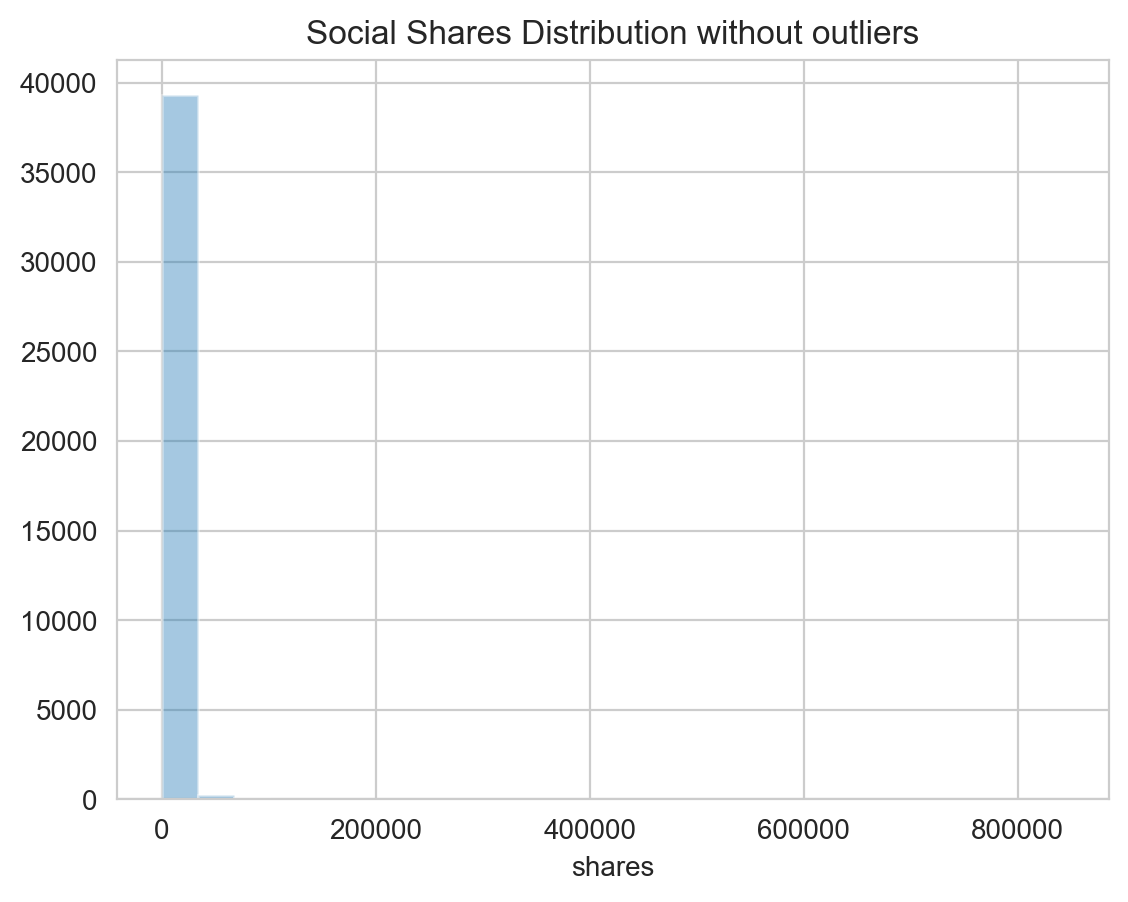

In [7]:
# Visualization Target

plt.xlabel('Shares')
plt.title('Social Shares Distribution without outliers')
print(sns.distplot(df.shares,kde=False, bins=25))

Text(0.5, 0, 'Shares')

Text(0.5, 1.0, 'Social Shares Distribution without outliers')

AxesSubplot(0.125,0.11;0.775x0.77)


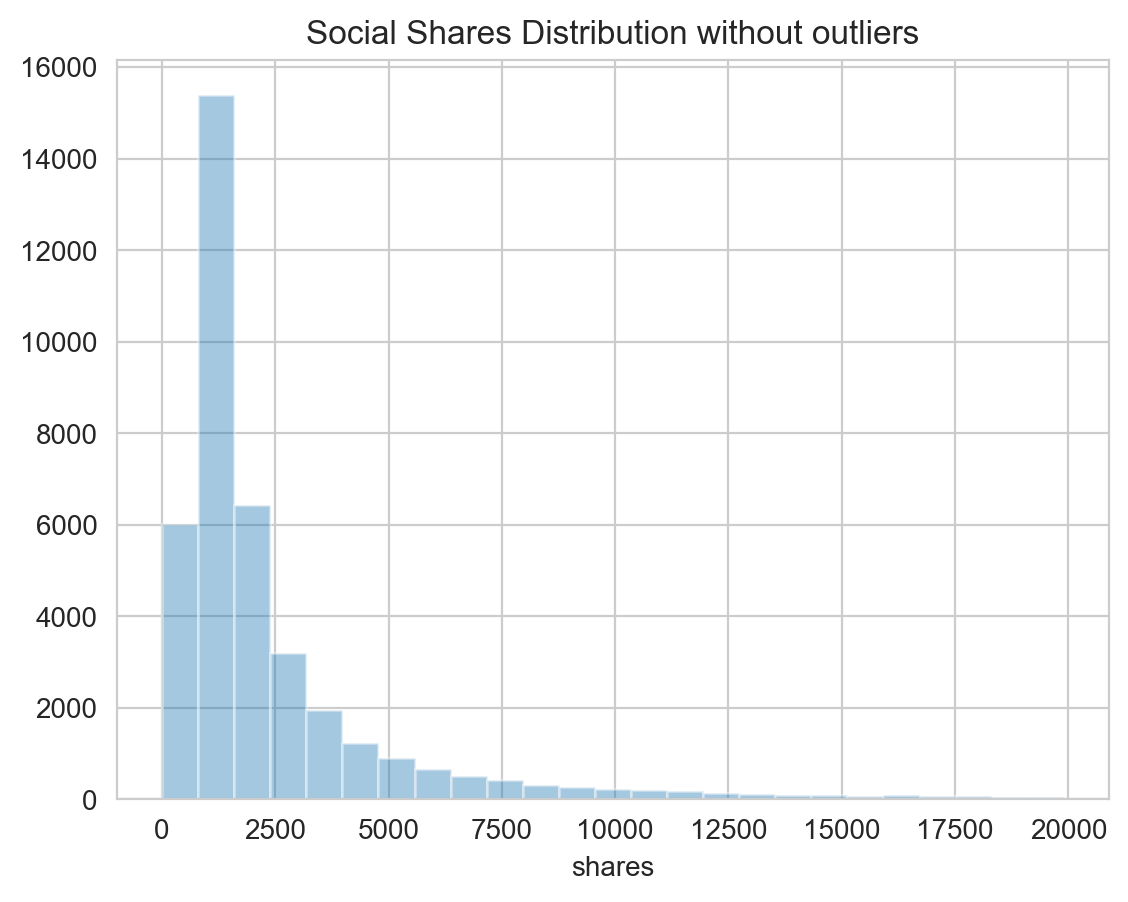

In [8]:
# Let us see the distribution with share < 20000
# Distribution of social shares without outliers
plt.xlabel('Shares')
plt.title('Social Shares Distribution without outliers')
print(sns.distplot(df[df.shares < 20000].shares,kde=False, bins=25))

In [9]:
print('Max of the Target shares:\t', df.shares.max())
print('Min of the Target shares:\t', df.shares.min())
df.shape

Max of the Target shares:	 843300
Min of the Target shares:	 1


(39644, 61)

In [10]:
# Targets shows a big variance 
# Need to do analisys which is essential to understand the outliers
print('Numbers of rows with shares > 20000:\t', df[df['shares']> 20000].shares.count())

Numbers of rows with shares > 20000:	 818


> - Number of rows > 20000 is 818 of 39644 rows (2%)

In [11]:
#Removing rows with 'shares' > 20000
df = df[df['shares'] < 20000]
df.shape

(38818, 61)

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Social Shares Distribution')

<AxesSubplot: title={'center': 'Social Shares Distribution'}, xlabel='shares'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


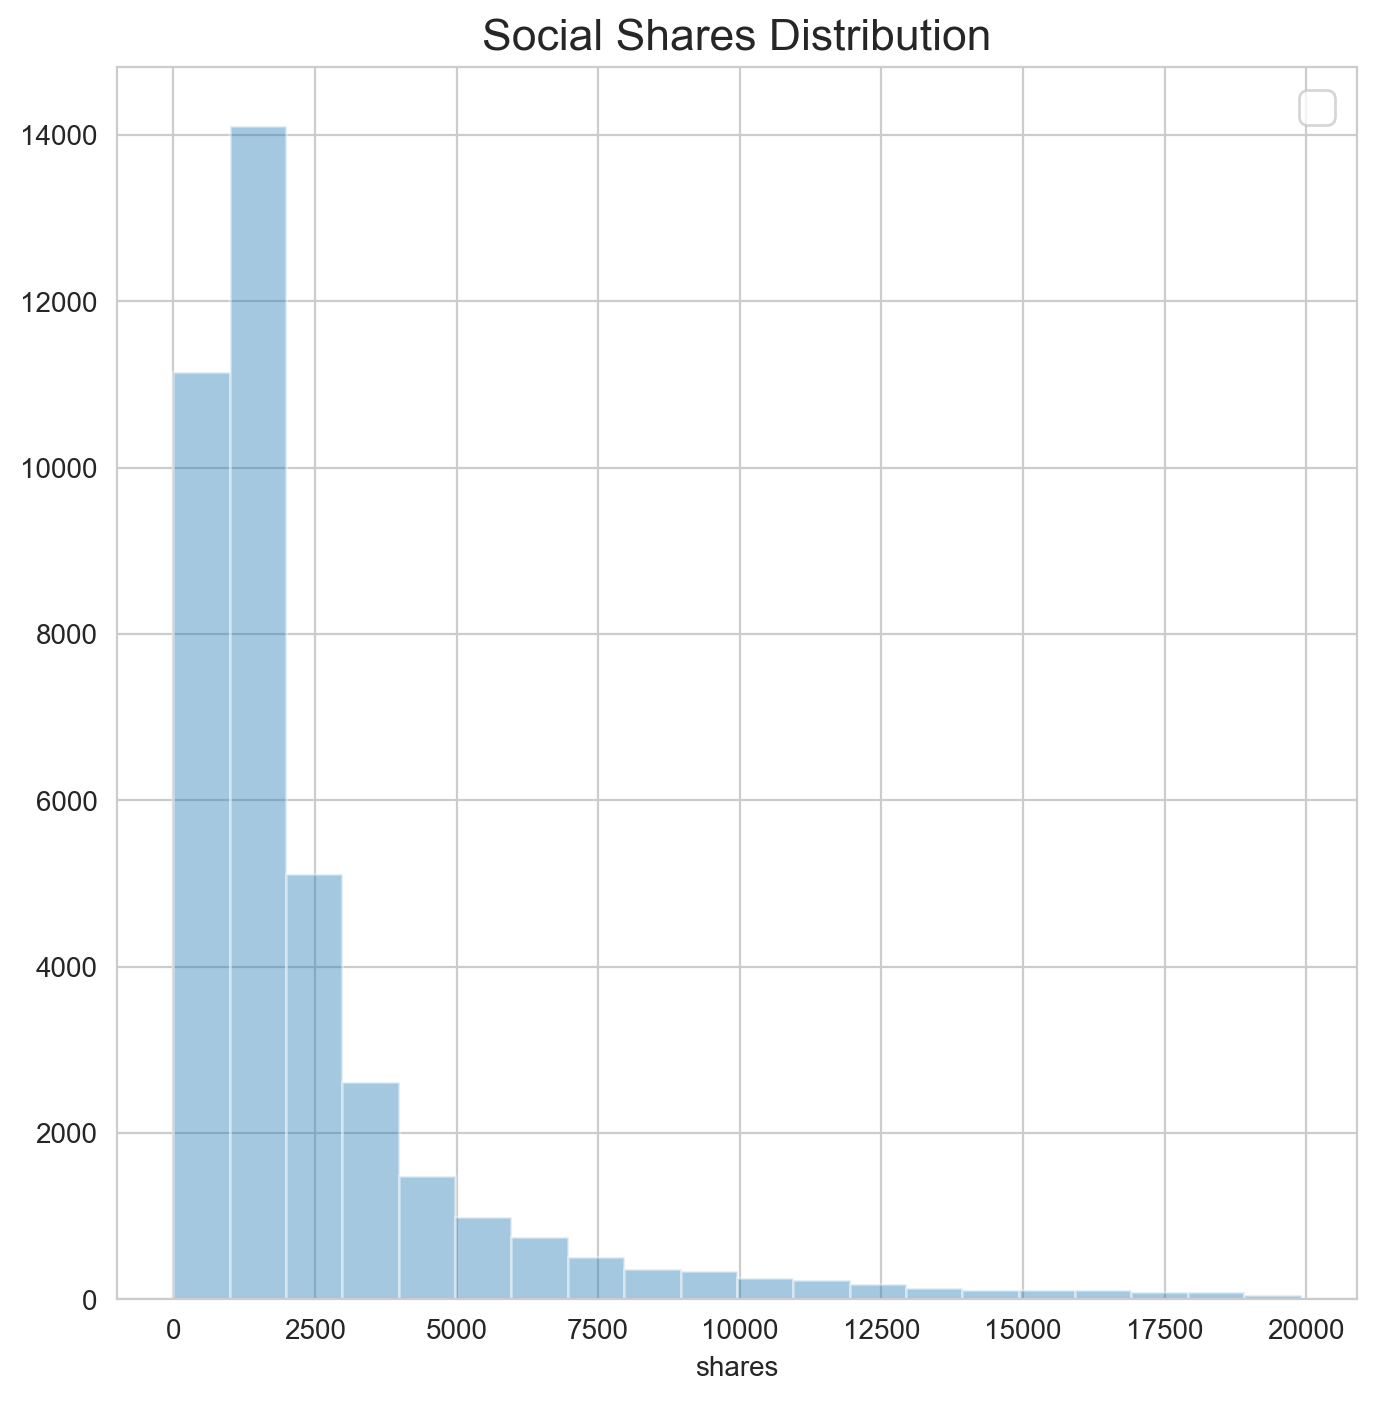

None


In [12]:
# Plot distribution without outliers 
plt.figure(figsize = (8,8))
plt.title('Social Shares Distribution', fontsize = 16)
sns.distplot(df.shares, bins = 20, norm_hist=False, kde=False)
plt.legend(fontsize = 16)
print(plt.show())

Social share distribution is considerably skewed and the target shows a big variance

# Target Transformation

- The distribution is considerably skewed and definitely not normal. I used logarithmic scaling. 

### Logarithmic scaling 

In [13]:
# Logharithmic scaling 
df['shares_log'] = np.log1p(df.shares)
print(round (np.mean(df['shares_log']),3))
print(round (np.median(df['shares_log']),3))

7.411
7.245


In [14]:
y = df.shares_log.values   

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Social Shares Distribution (Plot Logharithmic scaling)')

<AxesSubplot: title={'center': 'Social Shares Distribution (Plot Logharithmic scaling)'}, xlabel='shares_log'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


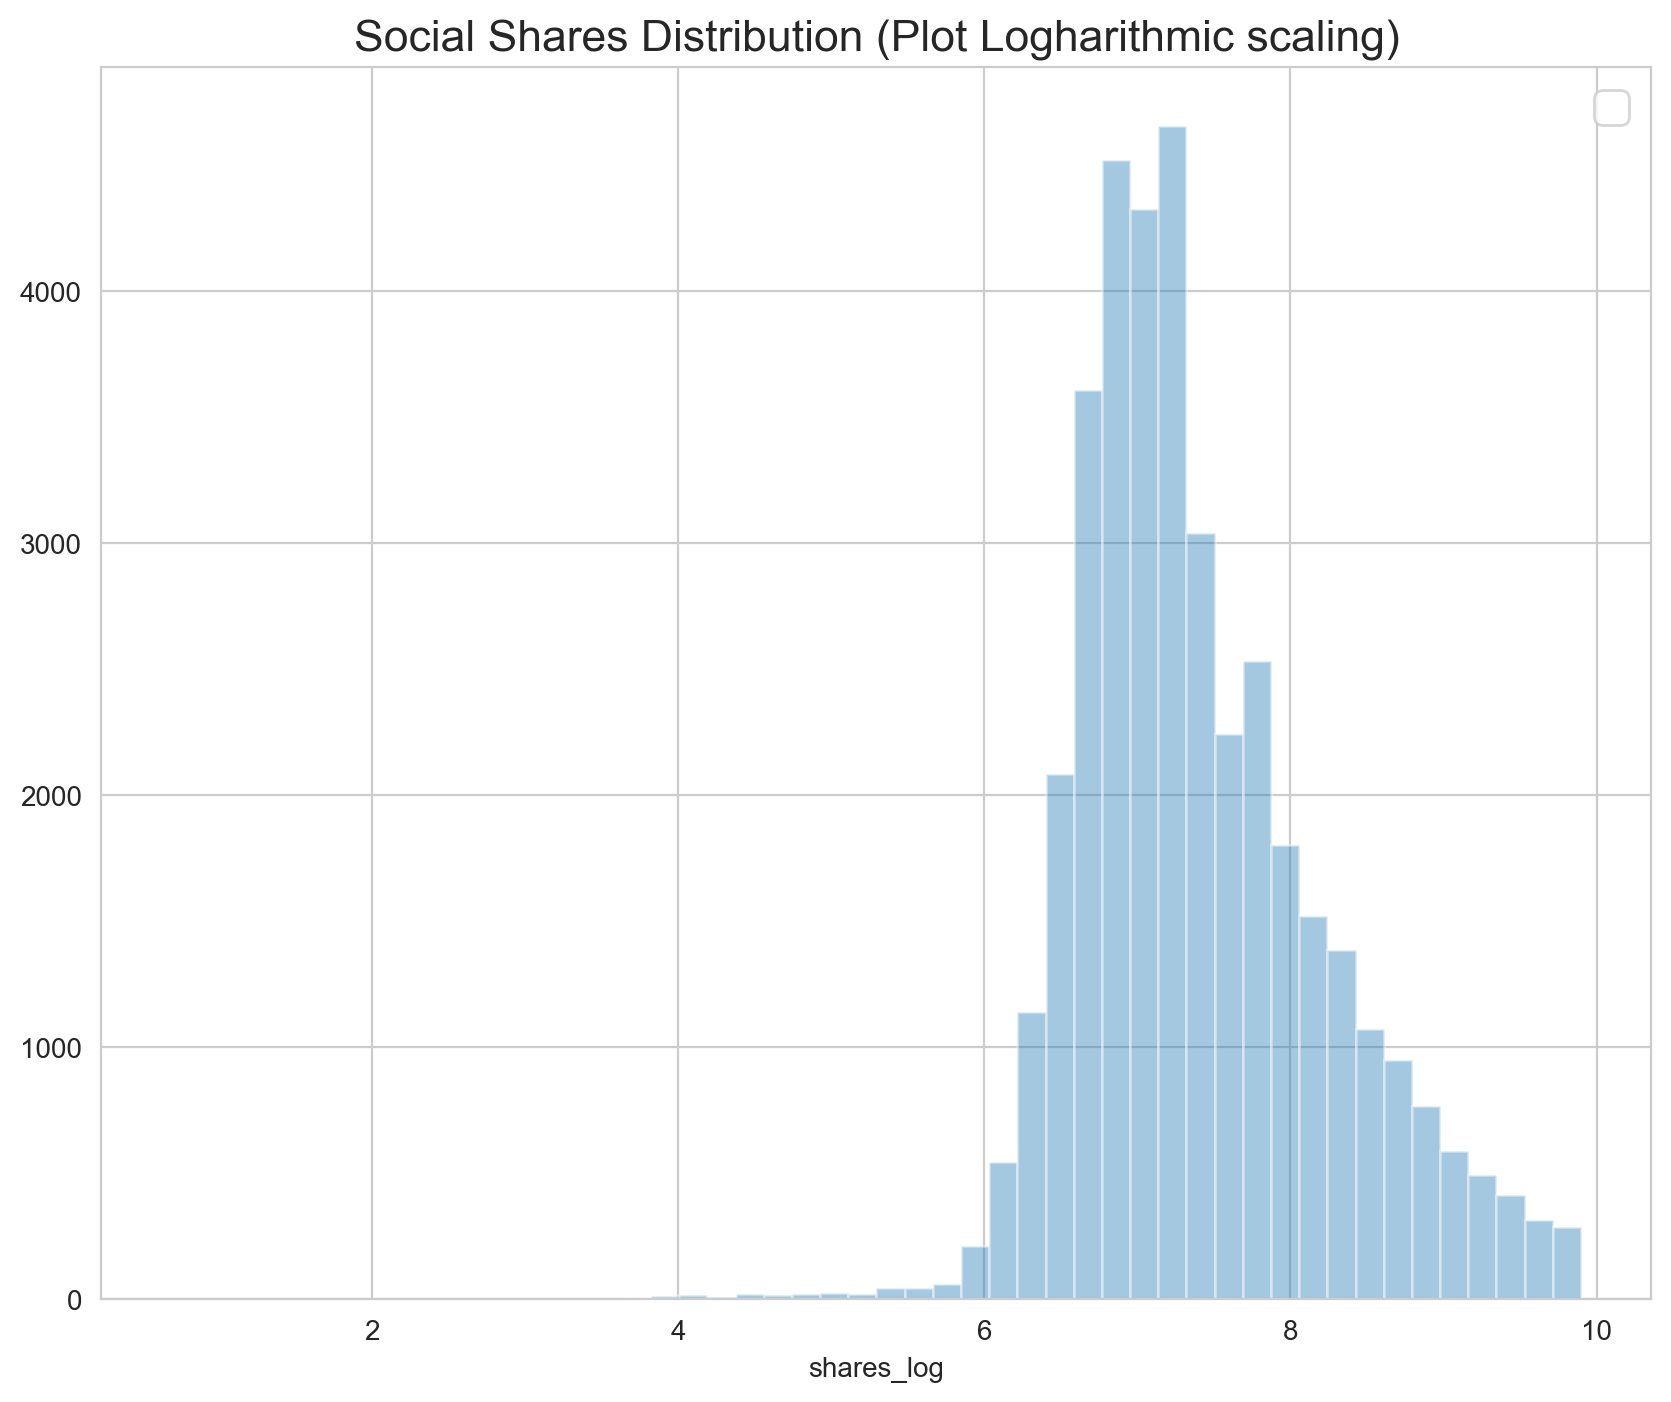

In [15]:
# natural log of social shares is more normally distributed(Logharithmic scaling)
plt.figure(figsize = (10,8))
plt.title('Social Shares Distribution (Plot Logharithmic scaling)', fontsize = 16)
sns.distplot(df.shares_log, bins = 50, norm_hist=False, kde=False)
plt.legend(fontsize = 16)
plt.show()

There is change in visualization which makes it easier to distinguish counts.

### Target Transformation for classification analysis

- The target variable shows a high variance. I change the target value to binary category.
- I have used median as measure of central tendency. The median es the value which occupies the middle position.
- The article considers being popular if the number of shares exceeded 7.24 else it’s classified as unpopular.
(Without logarithmic scaling the news item will be popular if the number of shares exceeded 1,400 social shares).

In [16]:
y_c = df['shares_log'].map(lambda x: 1 if x >7.24  else 0)

In [17]:
y_c.value_counts()

1    20328
0    18490
Name: shares_log, dtype: int64

In [18]:
# Function with targets transformations
def df_tran(df):
    df = df[df['shares'] < 20000]
    df['shares_log'] = np.log1p(df.shares)
    df["y"] = df['shares_log']
    df["y_c"] = df['shares_log'].map(lambda x: 1 if x >7.24  else 0)    
    return df
df = df_tran(df)
df.to_csv('./df.csv', encoding='utf-8',index_label= True)

In [ ]:
df_feature=df
df_feature.head()

<a id='step3'></a>

# Step 3  Features Enginering 



- The Dataset contains a large number of variables, some of them are relating 
to meta-data
such as channel type, the day the news story was published and the dataset contains natural language processing
features (The Latent Dirichlet Allocation was applied to all texts).

- In this area I focused on the study of features selection and outliers

>For the features engineering analysis I divided the analysis: 

1. Definition Features 
2. Categorical Features
3. Numerical Features
4. Ckeck correlation
5. Number of share news trend

<a id='f31'></a>
##  3.1 Definition Features

In [ ]:
# cols.remove('url', 'shares' and 'shares_log')
cols = list(df_feature.columns)
cols.remove('shares_log')
cols.remove('shares')
cols.remove('url')
cols.remove('y')
cols.remove('y_c')
X = df_feature[cols]
X.head(2)

### First - a quick look at columns which are directly related to shares

In [ ]:
shares = df_feature[[c for c in df_feature.columns if "share" in c]].copy()
for c in shares.columns:
    shares[c] = np.log(shares[c] + 1)
sns.pairplot(shares)

I have analysed the point that could be an outlier. I do not have enough information about the content to know if this article could be relevant to the analysis.

<a id='f32'></a>
##  3.2 Categorical Features

- Mashable.com has categorized the articles into 6 channels: Lifestyle,Entertainment,Social Media, Technology and World. And the day of the week that the new was published.

In [ ]:
# Categorical Columns
categorical = ["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
"data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
'weekday_is_monday','weekday_is_tuesday',"weekday_is_wednesday","weekday_is_thursday",
"weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend"]

In [ ]:
categorical = X[[col for col in df_feature.columns if col in categorical]]

### Plot to see the occurence of categorical columns

In [ ]:
def plot_value_occurences(self,normed = False, columns = None, 
                              fig_size = (15,15), xmarks = False,ymarks=True,
                              mn = (10,10), verbose = 0):
        if columns == None: columns = self.columns.tolist()         
        num_of_cols = len(columns)
        if verbose > 0: print('Generating ',num_of_cols,' plots')        
        m,n = mn        
        plt.clf()
        plt.figure(figsize=fig_size)
        plt.suptitle('Histogram of unique values',fontsize=25)
        for i in range(num_of_cols):
            col = columns[i]
            plt.subplot(m,n,i+1)
            plt.title(col)
            self[col].value_counts(dropna = False).plot(kind='bar');
            if xmarks == False: plt.xticks([])
            if ymarks == False: plt.yticks([])
        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()
        return None
    
plot_value_occurences(categorical, mn=(4,4), columns=list(categorical.columns))
plt.show()

> - The number of occurences on Thursday and World channel are the highest

### Distribution of Weekdays

In [ ]:
#plt.figure(figsize = (6,6))
colors = ["g","r","b","c","m","y",'#133ea7']    
plt.title('Social Shares by weekday', fontsize = 16)
df_feature[[col for col in df_feature.columns if 'weekday_is' in col]].sum().plot(kind = 'bar',\
                                        align='center', color=colors)
plt.show()

> The number of shares are highest during the middle of the week and decrease during the weekends; on Tuesday, Wednesdays and Thursday are higher than the 
> rest of days


In [ ]:
# Let us see what is happening during weekends
df_feature.groupby('is_weekend').mean().T

> - On average, weekends receive more shares than weekdays. However, a weekend article will have less opportunity to be shared as referenced articles in Mashable - 
>- This could be relevant to know about how it work as a self_reference. 

### Distribution of Channels

In [ ]:
plt.figure(figsize = (8,8))

Lifestyle = df_feature[df_feature['data_channel_is_lifestyle']== 1].shares.count()
Entertainment = df_feature[df_feature['data_channel_is_entertainment']== 1].shares.count()
Bus = df_feature[df_feature['data_channel_is_bus']== 1].shares.count() #Business
Socmed = df_feature[df_feature['data_channel_is_socmed']== 1].shares.count()
Tech = df_feature[df_feature['data_channel_is_tech']== 1].shares.count()
World = df_feature[df_feature['data_channel_is_world']== 1].shares.count()

D = {'Entertainment':Entertainment, 'Business':Bus,'Social Media':Socmed, 'Tech':Tech, 'World':World}
colors = ["g","r","b","c","m","y",'#624ea7']
plt.bar(range(len(D)), D.values(), align='center', color=colors)
plt.xticks(range(len(D)), D.keys())
plt.title('Social Shares by Channel', fontsize = 16)
plt.show()

> - The number of shares articles in World channel is the highest. It is followed by Tech News and Entertainment.

> - We dont have information if any channel could be recorded for more than one category.

<a id='f33'></a>
##  3.2 Numerical Feautures

 - The dataset contains
features related to links and Digital Media (videos and images)in the article.
 

In [ ]:
# Create group numerical features
num_col = [col for col in X.columns if col not in categorical]
num = X[[col for col in X.columns if col not in categorical]]
num.describe()

> - we have a bunch of features that have only the values 0 and 1. En general the varibles show a big variance.

### Distribution plots for numerical variables

Examined the distribution of numerical variables, including the peaks, spread, and symmetry. 

In [ ]:
fig, axes = plt.subplots(nrows=15, ncols=3,figsize=(50, 50),)
for n,i in enumerate(num.columns):   
    sns.distplot(num[i], ax=axes[int(n/3), int(n%3)],kde=False) 
    plt.xlabel(i, fontsize = 40 )
    plt.title(i)
plt.tight_layout
plt.show()


> - Each column has a unique curve. LDA columns (closeness to LDA topics) show the normal distribution slightly skew in both directions (right and left). In general, natural language proccesing features dont show any clear distribution are concentrating in only a few values.

### Prepocessing: Sentimental Analysis

I have explored the relationship between the number of times an article is shared vs Sentimental Analysis features. For example, how does the title affect popularity and the article's overall polarity. Similarly, with topics.

** Scatterplot with coefficient r **
The correlation coefficient r measures the strength and direction of a linear relationship between two variables on a scatterplot. The value of r is always between +1 and –1. 

#### Ttitle sentimetal polarity against the number of times an article is shared

In [ ]:
#seaborn.jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)

In [ ]:
sns.jointplot(data=None,x=df_feature.title_sentiment_polarity, y=df_feature.shares_log, joint_kws=dict(s=25, alpha=0.6))
#sns.jointplot(df.title_sentiment_polarity, df.shares_log, joint_kws=dict(s=25, alpha=0.6))

> - A moderate uphill (positive) relationship between the title sentimental polarity and the number of social shares.

#### Global sentimetal analysis against the number of times an article is shared 

In [ ]:
sns.jointplot(data=None,x=df_feature.global_sentiment_polarity, y=df_feature.shares_log, joint_kws=dict(s=25, alpha=0.6))


> - A moderate uphill (positive) linear relationship between the body sentimental polarity and the number of shares.

#### Box plot of LDA topics features against the number of times an article is shared 

In [ ]:
topics = ["LDA_00", "LDA_01","LDA_02", "LDA_03","LDA_04"]
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20, 6))
topics = df_feature[topics]
topics['target'] = df_feature['shares_log']
for i in range(5):
    topics.iloc[:,[i,5]].plot(kind = 'scatter', x = topics.columns[i] , y = 'target', ax = axes[int(i/3),int(i%3)])
plt.show()

### Digital Media

I would like to know the predictive power of Digital Media features.

#### Number Images Vs number of times an article is shared 

In [ ]:
sns.jointplot(data=None,x=df_feature.num_imgs,y=df_feature.shares_log, joint_kws=dict(s=25, alpha=0.6))
plt.show()

> - A moderate uphill (positive) linear relationship between the number of images in the news and the number of social shares

#### Number Videos Vs Number of time an article is shared 

In [ ]:
sns.jointplot(data=None,x=df_feature.num_videos,y=df_feature.shares_log, joint_kws=dict(s=25, alpha=0.6))
plt.show()

> - A weak uphill (positive) linear relationship between the number of videos in the news and shares

> - It seems that the majority does not include any videos and there are very few which include a higher number of videos. For this reason, I created a dummy variable for including/not including videos. However, the quality of models decreased and I decided to removed it again.

#### TimeDelta Distribution

TimeDelta variable means days between the article publication and the dataset acquisition

In [ ]:
# Plot distribution time delta
plt.xlabel('TimeDelta')
plt.title('Distribution of TimeDelta')
sns.distplot(df_feature.timedelta,bins=5)

> - TimeDelta shows a high variance in the dataset

> - This will be important to know the relationship between the number of times an article is shared vs the article has been published.

<a id='f35'></a>
##  3.5 Check Correlations



- I've plotted a cluster map based on correlation of all variables to explore the redundancy in our data. 

In [ ]:
df_corr = df_feature.corr()   
#cmap = sns.diverging_palette(h_neg=100, h_pos=250, s=90, l=30, as_cmap=True, center="light",)
sns.clustermap(df_corr, figsize=(10, 10))
#sns.clustermap(df_corr, figsize=(14, 14), cmap = cmap,rotation = 0)

#### Let us examine the relationship among some of them 

In [ ]:
sns.jointplot(data=None,x=df_feature.rate_negative_words, y=df_feature.shares, joint_kws=dict(s=25, alpha=0.6))

In [ ]:
colors = np.random.rand(38818)
plt.scatter(df_feature.rate_positive_words, df_feature.self_reference_min_shares,c=colors, alpha=0.5)
plt.show()

> - Don’t seem to shown any kind of relationship among the self_reference columns and the rate_positive (even a vague one)




In [ ]:
sns.jointplot(data=None,x=df_feature.kw_avg_avg, y=df_feature.abs_title_sentiment_polarity, joint_kws=dict(s=25, alpha=0.6))
plt.show()

In [ ]:
sns.jointplot(data=None,x=df_feature.LDA_02, y=df_feature.kw_min_min, joint_kws=dict(s=25, alpha=0.6))

> - No columns-related pattern


> - ### **A full feature set include much noise. I applyed PCA for dimension reduction**



<a id='f36'></a>
###  3.6 Number of share news  trend

I considered analysing whether or not there was a relationship between the sharing of news and the month that it was published in by appling the Time Series model

- Plot the shares for months

In [ ]:
# Function to extract date from my url column
def Extractdate(date):
    return date[20:31]
df_feature['datenew'] = df_feature['url'].map(Extractdate)

In [ ]:
df_feature['datenew'] = pd.to_datetime(df_feature.datenew)

In [ ]:
df_time = df_feature.copy()
df_time.set_index('datenew', inplace=True)
df_time.index.name = None

In [ ]:
monthly_resampled_df = df_time.resample('M').mean()
monthly_resampled_df.shares.plot(figsize=(8,4), title= 'Monthly Shares online News', fontsize=14)
plt.show()

> - During this period the number of share decreased year on year. 



In [ ]:
# Unnecesary column
df_feat_Un = df_feature.drop([u'url'],axis=1)

   
## Save my result as a CSV

In [ ]:
# Adding index_label to avoid unaamed index
df_feat_Un.to_csv('./df_feat_Un.csv', encoding='utf-8',index_label= False)

<a id='step4'></a>

# Step 4: Dimensionality reduction

I used principal component analysis to reduce the correlation between features and to reduce the number of features. The main purposes of a PCA analysis is to identify patterns to reduce the dimension of the dataset with minimal loss of information.

> In this section, I did the following:

1. PCA to identify patterns to reduce the dimension of the dataset
2. Clustering Analysis: K-Means and Hierarchical clustering

<a id='f41'></a>
##      4.1 Principal Components Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
cols = list(df_feat_Un.columns)
cols.remove('shares')
cols.remove('shares_log')
cols.remove('y')
cols.remove('y_c')
cols.remove('datenew')
#cols.remove('url')
X = df_feat_Un[cols]

In [ ]:
X.head(2)

Before applying PCA, data needs to be standardised. Standardising is usually done when the variables on which the PCA is performed are not measured on the same scale. If they are not measured on the same scale and you choose to work on the non standardised variables, it is often the case that each Principal Component is dominated by a single variable.
The standardising method being applied is Standard Scaling. The Standard Scaler standardises features by removing the mean and scaling to unit variance - assigning equal importance to all variables.


In [ ]:
# Standarization
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

In [ ]:
#Calculate and plot the explained variance
pca = PCA()
pca.fit(Xstd)
varianza = pca.explained_variance_ratio_
var_acum= np.cumsum(varianza)

ax = plt.gca()
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('components', fontsize=16)
ax.set_title('cumulative variance explained vs compoents\n', fontsize=20)


plt.bar(range(len(varianza)), varianza)
plt.plot(range(len(varianza)), var_acum)
plt.show()
print(var_acum)

In [ ]:
#Transform the subjective data into principal component space
# The transform function in the PCA will create you new component variable matrix.

Xstd_to_PCX = pca.fit_transform(Xstd)

<a id='f42'></a>
### 4.1.1. Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis.

This is the gold standard in determining which components aren't noise.


In [ ]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [ ]:
# This should auto-work (for 95th percentile)
hep_pa = horn_parallel_analysis(Xstd_to_PCX.shape, percentile=95)